In [1]:
%matplotlib inline

from IPython.display import HTML

%run -i ../../code/multirover.py
#%run -i ../../code/utils.py

%cat ../../0_Diseno_experimental.txt

Diseño experimental

1. Observaciones de una frecuencia (C1 ó L1) sin correccion ionosferica

1.1 sin error en observable de distancia (e(d) = 0)
1.2 con error en observable de distancia (e(d) = 5%)
1.3 con error en observable de distancia (e(d) = 10%)

2. Estación base con corrección ionoférica de doble frecuencia.
estaciones móviles: Sin Corrección ionoférica.

2.1 sin error en observable de distancia (e(d) = 0)
2.2 con error en observable de distancia (e(d) = 5%)
2.3 con error en observable de distancia (e(d) = 10%)

3. Estación base y móviles con corrección ionoférica mixta.

estación maestro: Corrección ionoférica de doble frecuencia
estaciones móviles: Modelo ionosférico klobuchar.

3.1 sin error en observable de distancia (e(d) = 0)
3.2 con error en observable de distancia (e(d) = 5%)
3.3 con error en observable de distancia (e(d) = 10%)

4. Estación base y móviles con corrección ionoférica klobuchar.

4.1 sin error en observable de distancia (e(d) = 0)
4.2 con error en observab

In [2]:
dia1 = "010"
dian = "010"
ano = "2017"

Observable = "C1"
# Variables de la grafica
error_max = 100

# Ubicacion de la Rinex local DB 
Rinex_dataBase      = "../../new_data"
Simu_Folder         = getcwd() +"/" + "Temp_Simul_data"

In [4]:
"""
obsfile1 = "../../NavFiles/cn200100.17o" 
navfile1 = "../../NavFiles/cn200100.17n" 

obsfile2 = "../../NavFiles/tgpm0100.17o"
navfile2 = "../../NavFiles/tgpm0100.17n"


obsfile1 = "../../NavFiles/bara0100.17o" 
navfile1 = "../../NavFiles/bara0100.17n" 

obsfile2 = "../../NavFiles/tgdr0100.17o"
navfile2 = "../../NavFiles/tgdr0100.17n"

obsfile3 = "../../NavFiles/jme20100.17o"
navfile3 = "../../NavFiles/jme20100.17n"


obsfile1 = "../../NavFiles/tgmx0100.17o" 
navfile1 = "../../NavFiles/tgmx0100.17n" 

obsfile2 = "../../NavFiles/unpm0100.17o"
navfile2 = "../../NavFiles/unpm0100.17n"

obsfile3 = "../../NavFiles/cn200100.17o"
navfile3 = "../../NavFiles/cn200100.17n"
"""

obsfile1 = "../../NavFiles/ljrn0100.17o"
navfile1 = "../../NavFiles/ljrn0100.17n"

obsfile2 = "../../NavFiles/p5530100.17o" 
navfile2 = "../../NavFiles/p5530100.17n" 

obsfile3 = "../../NavFiles/p5540100.17o"
navfile3 = "../../NavFiles/p5540100.17n"

obsfile4 = "../../NavFiles/fzhs0100.17o"
navfile4 = "../../NavFiles/fzhs0100.17n"

data1, b1, rec_pos1 = rinex_to_dataframe_ionosfe(obsfile1, navfile1)
data2, b2, rec_pos2 = rinex_to_dataframe_ionosfe(obsfile2, navfile2)
data3, b3, rec_pos3 = rinex_to_dataframe_ionosfe(obsfile3, navfile3)
data4, b4, rec_pos4 = rinex_to_dataframe_ionosfe(obsfile4, navfile4)

df = pd.DataFrame()

df["prns_1"] = data1["prns"]
df["prns_2"] = data2["prns"]
df["prns_3"] = data3["prns"]

WARNING! observation `C2` no present in file ../../NavFiles/ljrn0100.17o
WARNING! observation `C2` no present in file ../../NavFiles/p5530100.17o
WARNING! observation `C2` no present in file ../../NavFiles/p5540100.17o
WARNING! observation `C2` no present in file ../../NavFiles/fzhs0100.17o


In [5]:
#data = [data1, data2, data3]
data = [data1, data2, data3, data4]

#realpos=[rec_pos1, rec_pos2, rec_pos3]
realpos=[rec_pos1, rec_pos2, rec_pos3, rec_pos4]

In [6]:
def get_data(dat_common, data_rx, epoc, csats, station_name):
    import types
    requested_obstypes = ["C1", "C2", "P1", "P2", "L1", "L2", "S1", "S2"]
    columns2search = ["prns", "alphas", "betas", "prns_elev", "prns_az", "prns_clockbias", "prns_pos", "Iono"]

    col_rename = {k:k+"_master" for k in columns2search+requested_obstypes}
    col_rename["prns"] = "prns"

    r = []
    data = {}

    # http://thomas-cokelaer.info/blog/2014/06/pandas-how-to-compare-dataframe-with-none/
    if len(dat_common.columns) == 0: #isinstance(dat_common, types.NoneType) == True: #dat_common.empty:
        #print('DataFrame is empty!')
        obstypes = [c for c in data_rx.columns if c in requested_obstypes]

        #print "csats", len(csats)

        idx1 = []
        for k, sat in enumerate(data_rx.iloc[epoc].prns):
            if sat in csats:
                idx1.append(k)

        columns = ["prns", "prns_elev", "prns_az", "prns_clockbias", "prns_pos", "Iono"]+obstypes
        names = []

        for col in data_rx.columns:
            if col in columns:
                names.append(col)
                values = data_rx.iloc[epoc][col][idx1]
            elif col == "prns":
                names.append(col)
                values = csats
            else:
                names.append(col)
                values = np.array(data_rx.iloc[epoc][col])

            r.append(values)

        r = pd.Series(r, index=names).to_frame()
        df_temp =pd.DataFrame(r.T, columns=names)
        df_temp.rename(columns=col_rename, inplace=True)
        return df_temp

    else:

        obstypes = [c for c in data_rx.columns if c in requested_obstypes]

        idx1 = []
        for k, sat in enumerate(data_rx.iloc[epoc].prns):
            if sat in csats:
                idx1.append(k)

        for obstype in obstypes:
            dat_common[obstype+"_"+station_name] = pd.Series([data_rx.iloc[epoc][obstype][idx1]], index=dat_common.index)

        columns = ["prns_elev", "prns_az", "prns_clockbias", "prns_pos", "Iono"]

        for col in columns2search:
            if col in columns:
                values = data_rx.iloc[epoc][col][idx1]
                key = col+"_"+station_name
            elif col == "prns":
                values = csats
                key = "csats"
            else:
                key = col+"_"+station_name
                values = np.array(data_rx.iloc[epoc][col])

            dat_common[key] = pd.Series([values], index=dat_common.index)

    return dat_common

In [8]:
def simple_test_multirover_inner(data_common, pareja, real_pos, Obser="C1", 
                               local=None, remote=None, dist=None,
                               iono_model_master=None,
                               iono_model_rover =None,
                               res_plot=300, silent_exec=False):

        Results = {}
        r = []

        dc_est = []
        d_real = []
        stdalone_pos = []
        stdalone_err = []
        coop_pos = []
        coop_err = []
        coop_t = []

        #print ("\t\t Rinex Observation: "), epoc
        """
        for i in range(len(data_common)):
            if i % res_plot == 0:
                print i,
        """
        dat = data_common.iloc[0]
        gps_sow = dat.gps_sow

        #print "Satelites en común ", len(dat['csats']), len(dat['prns'])
        if len(dat['csats'])>=4:

            # Metodos desarrollados
            ## Compute standalone positions
            for k, station in enumerate(pareja):
                if k == 0:

                    #print np.shape(dat.loc['prns_pos_master']), np.shape(dat[Obser+'_master']), np.shape(dat['prns_clockbias_master'])

                    #print "d", np.shape(dat.loc['prns_clockbias_master'])
                    posstd,_,_,_ = compute_least_squares_position(dat.loc['prns_pos_master'],
                                                                  dat.loc['prns_clockbias_master'],
                                                                  dat.loc[Obser+'_master'])
                    err = np.linalg.norm(posstd[:3] - real_pos[k])

                    stdalone_pos.append(posstd[:3])
                    stdalone_err.append(err)

                else:
                    #print "e", np.shape(dat.loc['prns_clockbias_'+station])
                    posstd,_,_,_ = compute_least_squares_position(dat.loc['prns_pos_'+station],
                                                                  dat.loc['prns_clockbias_'+station],
                                                                  dat.loc[Obser+"_"+station])
                    err = np.linalg.norm(posstd[:3] - real_pos[k])

                    stdalone_pos.append(posstd[:3])
                    stdalone_err.append(err)

            # compute distances between receivers
            for k, station in enumerate(pareja):
                if k != 0:
                    #print k, stdalone_pos[0], stdalone_pos[k]
                    dc, teta, dc_vec = d_teta_calc(stdalone_pos[0], stdalone_pos[k])
                    dr, teta, dc_vec = d_teta_calc(real_pos[0], real_pos[k])
                    dc_est.append(dc)
                    d_real.append(dr)

            start_time = time.time()

            if is_number(dist):
                ri,_,_,_ = coop_ls_solver_multirover(dat["gps_sow"], pareja, [dist*x for x in d_real], dat,
                                                 iono_model_master=iono_model_master,
                                                 iono_model_rover =iono_model_rover)
            elif dist == None:
                ri,_,_,_ = coop_ls_solver_multirover(dat["gps_sow"], pareja, dc_est, dat,
                                                     iono_model_master=iono_model_master,
                                                     iono_model_rover =iono_model_rover)
            coop_t = time.time() - start_time

            #r.append([gps_sow, real_pos, d_real, dc_est, coop_t, ri, data_common])  

            c = 0
            for k, station in enumerate(pareja):
                if k == 0:
                    coop_pos.append(ri[4*k:4*(k+1)-1])
                    coop_err.append(np.linalg.norm(ri[4*k:4*(k+1)-1] - real_pos[k]))
                else:
                    ini = 4*k #+ c
                    fin = 4*(k+1)-1 # + c
                    #print
                    #print k, ini, fin, ri, np.shape(ri[ini:fin]), np.shape(real_pos[k])
                    coop_pos.append(ri[ini:fin])
                    coop_err.append(np.linalg.norm(ri[ini:fin] - real_pos[k]))
                    c += 1


            #print dc_est
            #print stdalone_err
            #print coop_err
            #r.append([gps_sow, real_pos, d_real, dc_est, stdalone_pos, stdalone_err, coop_pos, coop_err, coop_t, ri, data_common])    
            r = [gps_sow, real_pos, dist, d_real, dc_est, stdalone_pos, stdalone_err, coop_pos, coop_err, coop_t, ri, data_common]    
        else:
            return

        names = ["gps_sow" ,"real_pos", "d", "dreal", "d_calc", "stdlone_pos", "stdlone_err", "coop_pos", "coop_err", "coop_time[s]", "rc_sol", "data_common"]

        return r, names #pd.DataFrame(r, columns=names)# Results

## Probando con otra pareja (4 estaciones)

In [10]:
%run -i ../../code/multirover.py

pareja = ("ljrn", "p553", "p554", "fzhs",) # ("TGMX", "UNPM", "CNC0",) #  ("REPO", "REP2", "REP3", "REP4",) #("BARA", "TGDR", "JME2",) 

Results = {}

import re 
# http://stackoverflow.com/questions/2669059/how-to-sort-alpha-numeric-set-in-python
def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)


res_plot = 100
results = []

for epoc in range(len(data[0])):
    
    if epoc % res_plot == 0:
        csats = data[0].iloc[epoc]['prns']
        for k, (d, station) in enumerate(zip(data, pareja)): # enumerate(zip(data[1:], pareja[1:])):
            csats = list( set(csats) & set(d.iloc[epoc]['prns']))

        csats = sorted_nicely(csats)
        d_common = pd.DataFrame()
        #print "c", len(csats)#, csats
        #print ("\t\t Rinex Observation: "), epoc,
        gps_time = data[0].iloc[epoc].gps_sow

        for k, (d, station) in enumerate(zip(data, pareja)):

            if gps_time == d.ix[epoc].gps_sow:
                #print station
                error = False
                d_common = get_data(d_common, d, epoc, csats, station)

            else:
                error = True
                #print station, error

        if error == False:
            #Results.setdefault(str(pareja), {})["10"] =  simple_test_multirover(d_common, pareja, realpos, dist=1.)
            r, n = simple_test_multirover_inner(d_common, pareja, realpos, dist=1.)
            results.append(r)
        else:
            print "no existen datos en comun para esta epoca GPS"
    
Results.setdefault(str(pareja), {})["10"] = pd.DataFrame(results, columns=n)

In [12]:
Results.keys()

["('ljrn', 'p553', 'p554', 'fzhs')"]

In [13]:
Results["('ljrn', 'p553', 'p554', 'fzhs')"]["10"]  #Results["('TGMX', 'UNPM', 'CNC0')"]["10"] #Results["('BARA', 'TGDR', 'JME2')"]["10"]

gps_sow                                           real_pos    d  \
0   172800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
1   174300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
2   175800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
3   177300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
4   178800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
5   180300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
6   181800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
7   183300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
8   184800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
9   186300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
10  187800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
11  189300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
12  190800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
13  192300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
14  193800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
15  195300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
16  196800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
17  198300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
18  199800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
19  201300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
20  202800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
21  204300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
22  205800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
23  207300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
24  208800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
25  210300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
26  211800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
27  213300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
28  214800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
29  216300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
30  217800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
31  219300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
32  220800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
33  222300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
34  223800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
35  225300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
36  226800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
37  228300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
38  229800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
39  231300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
40  232800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
41  234300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
42  235800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
43  237300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
44  238800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
45  240300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
46  241800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
47  243300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
48  244800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
49  246300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
50  247800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
51  249300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
52  250800.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
53  252300.0  [[-2531657.3365, -4592198.4073, 3621166.8873],...  1.0   
54  253800.0  [[-2531657.3365, -4592198.4073,

In [14]:
columns = ["stdlone_err", "coop_err"]
#df = R["['master_tgmx0100.17', 'rover1_unpm0100.17']"][10][columns]

def get_df_mean(R, stations, day, columns = ["stdlone_err", "coop_err", "dreal", "d_calc"]):
    
    results = pd.DataFrame()
    
    df = R[stations][day][columns]
    r = []
    for i in range(len(df)):
        d = df.iloc[i]
        for c in columns:
            #print k, d[k]
            d[c+"_mean"] = np.mean(d[c])

    results[str(stations)] = d
    return results, df

r, df = get_df_mean(Results, str(pareja), "10")
df

stdlone_err  \
0   [39.5623638638, 39.0398005094, 38.1523370537, ...   
1   [18.1454186477, 17.3737424908, 16.491539766, 1...   
2   [12.9312088398, 12.5770482955, 11.0889307948, ...   
3   [58.0733802077, 58.958375775, 58.6175499851, 5...   
4   [52.2950745006, 52.2540246163, 51.2716677878, ...   
5   [34.9004136415, 34.9081195699, 33.4785561072, ...   
6   [19.0800550169, 19.2124046584, 18.1211892392, ...   
7   [12.4058966925, 13.4406710288, 11.9198351387, ...   
8   [33.4489306802, 32.8786231798, 32.3919837364, ...   
9   [55.6566178899, 55.407933029, 53.8136537054, 5...   
10  [32.8844554947, 33.127318267, 32.4907649776, 3...   
11  [63.420494454, 62.8961118696, 61.7744056754, 6...   
12  [33.0225245845, 32.8442386938, 31.5053962479, ...   
13  [43.4104326129, 42.8935913141, 41.9801586212, ...   
14  [68.886980101, 68.5598559124, 68.052146752, 69...   
15  [21.1178441894, 21.1538952472, 19.4598127782, ...   
16  [29.075101421, 29.0443245037, 28.9223107382, 2...   
17  [62.5026219597, 61.1753164575, 61.6423646732, ...   
18  [70.6042995705, 70.5326481958, 70.6935097634, ...   
19  [55.9124727738, 55.9387227621, 54.8327341145, ...   
20  [67.5675166643, 67.3477618842, 67.5895069701, ...   
21  [72.0741991788, 72.2952206496, 71.7510793094, ...   
22  [56.2848067678, 57.4391997598, 55.4454646726, ...   
23  [31.4639159921, 30.8732925591, 29.6758814365, ...   
24  [32.7632835978, 32.6600969983, 32.4150354163, ...   
25  [44.1853359976, 44.3067097871, 43.2431654227, ...   
26  [58.2863047576, 58.5993349296, 57.3599611207, ...   
27  [45.6119965175, 45.7888928487, 45.3301108225, ...   
28  [69.5358344917, 69.848347301, 69.860591802, 68...   
29  [74.4444086396, 75.348413491, 74.8430908028, 7...   
30  [44.5461008885, 44.3326722423, 43.4464272039, ...   
31  [42.1209446385, 42.2465528791, 41.1919671785, ...   
32  [20.9743279937, 20.4759655295, 19.2985214544, ...   
33  [32.6480878322, 33.0981319271, 31.4478765896, ...   
34  [29.0365028015, 29.8556087768, 28.7131998702, ...   
35  [45.4009923962, 45.0821358097, 43.8231086886, ...   
36  [28.8903284785, 28.6339248411, 27.9050140309, ...   
37  [24.0257227721, 23.646942587, 21.372850504, 24...   
38  [29.7981179724, 29.7629019044, 28.706199828, 2...   
39  [79.7866864336, 80.4669969524, 79.9281478693, ...   
40  [90.3730670963, 90.6292884287, 89.5295340801, ...   
41  [37.5944116483, 37.1768915516, 34.4454604884, ...   
42  [46.7071205567, 45.9627130488, 45.0317246558, ...   
43  [25.1613739164, 25.6971282265, 23.7918003687, ...   
44  [37.623062002, 38.3469782603, 36.6093853778, 3...   
45  [33.6305690077, 33.001268539, 32.2740495266, 3...   
46  [40.0496370416, 39.4868777911, 39.3646935046, ...   
47  [72.1802338044, 71.8735705796, 70.8555366684, ...   
48  [53.5500444109, 53.4614664219, 52.2724647477, ...   
49  [36.049828436, 35.035806144, 34.0381783151, 35...   
50  [30.6010121309, 30.5303069138, 31.7156120533, ...   
51  [63.0229559633, 63.2332556895, 63.6825279045, ...   
52  [61.635593379, 60.5571904206, 61.6288720266, 6...   
53  [19.0978314793, 18.7266505076, 17.8039106289, ...   
54  [38.0336094787, 37.7586823966, 36.7203065602, ...   
55  [37.0035139625, 37.2401749768, 35.8292161719, ...   
56  [68.7345915715, 69.0036357042, 68.8200665668, ...   
57  [79.9212520892, 80.42649768, 79.0206983011, 80...   

                                             coop_err  \
0   [39.5623638592, 45.0544192966, 31.9270070839, ...   
1   [18.1454186472, 19.6326839687, 14.0991026062, ...   
2   [12.9312088386, 15.7766122216, 8.92347877648, ...   
3   [58.0733802071, 58.2029940423, 60.2333780163, ...   
4   [52.2950745003, 51.2324242788, 54.1651016755, ...   
5   [34.9004136402, 35.9000083398, 30.5618768549, ...   
6   [19.0800550167, 19.2830972289, 16.8679362428, ...   
7   [12.4058966938, 17.1358054792, 10.5726451163, ...   
8   [33.4489306781, 34.3245124648, 33.0550357336, ...   
9   [55.6566178887, 58.6791262227, 50.386212157, 5...   
10  [32.8844554938, 33.0577699107, 32.0878404979, .

In [65]:
import matplotlib.pyplot as plt

plot_vars = ["stdlone_err", "coop_err"]

parejas_kmz = {}

#parejas_kmz[0] = ("OLVN", "AIRS", "NWBL",)
#parejas_kmz[1] = ("BARA", "TGDR", "JME2",)
parejas_kmz[2] = ("ljrn", "p553", "p554", "fzhs",)
parejas_kmz[3] = ("CN20", "TGPM",)
parejas_kmz[4] = ('TGMX', 'UNPM',)

mean_std, plots = [], []

for k, v in parejas_kmz.iteritems():
    y = [np.mean(np.array(df.iloc[i][plot_vars[0]]) - np.array(df.iloc[i][plot_vars[1]])) for i in range(len(df))]
    #plt.plot(y)
    plots.append(y)
    mean_std.append((np.mean(y), np.std(y)))
    
print mean_std

[(0.034393012390498807, 0.4106910380622491), (0.034393012390498807, 0.4106910380622491), (0.034393012390498807, 0.4106910380622491)]


stdlone
RangeIndex(start=0, stop=58, step=1)
0     [39.5623638638, 39.0398005094, 38.1523370537, ...
1     [18.1454186477, 17.3737424908, 16.491539766, 1...
2     [12.9312088398, 12.5770482955, 11.0889307948, ...
3     [58.0733802077, 58.958375775, 58.6175499851, 5...
4     [52.2950745006, 52.2540246163, 51.2716677878, ...
5     [34.9004136415, 34.9081195699, 33.4785561072, ...
6     [19.0800550169, 19.2124046584, 18.1211892392, ...
7     [12.4058966925, 13.4406710288, 11.9198351387, ...
8     [33.4489306802, 32.8786231798, 32.3919837364, ...
9     [55.6566178899, 55.407933029, 53.8136537054, 5...
10    [32.8844554947, 33.127318267, 32.4907649776, 3...
11    [63.420494454, 62.8961118696, 61.7744056754, 6...
12    [33.0225245845, 32.8442386938, 31.5053962479, ...
13    [43.4104326129, 42.8935913141, 41.9801586212, ...
14    [68.886980101, 68.5598559124, 68.052146752, 69...
15    [21.1178441894, 21.1538952472, 19.4598127782, ...
16    [29.075101421, 29.0443245037, 28.9223107382, 2...
17 

ValueError: setting an array element with a sequence.

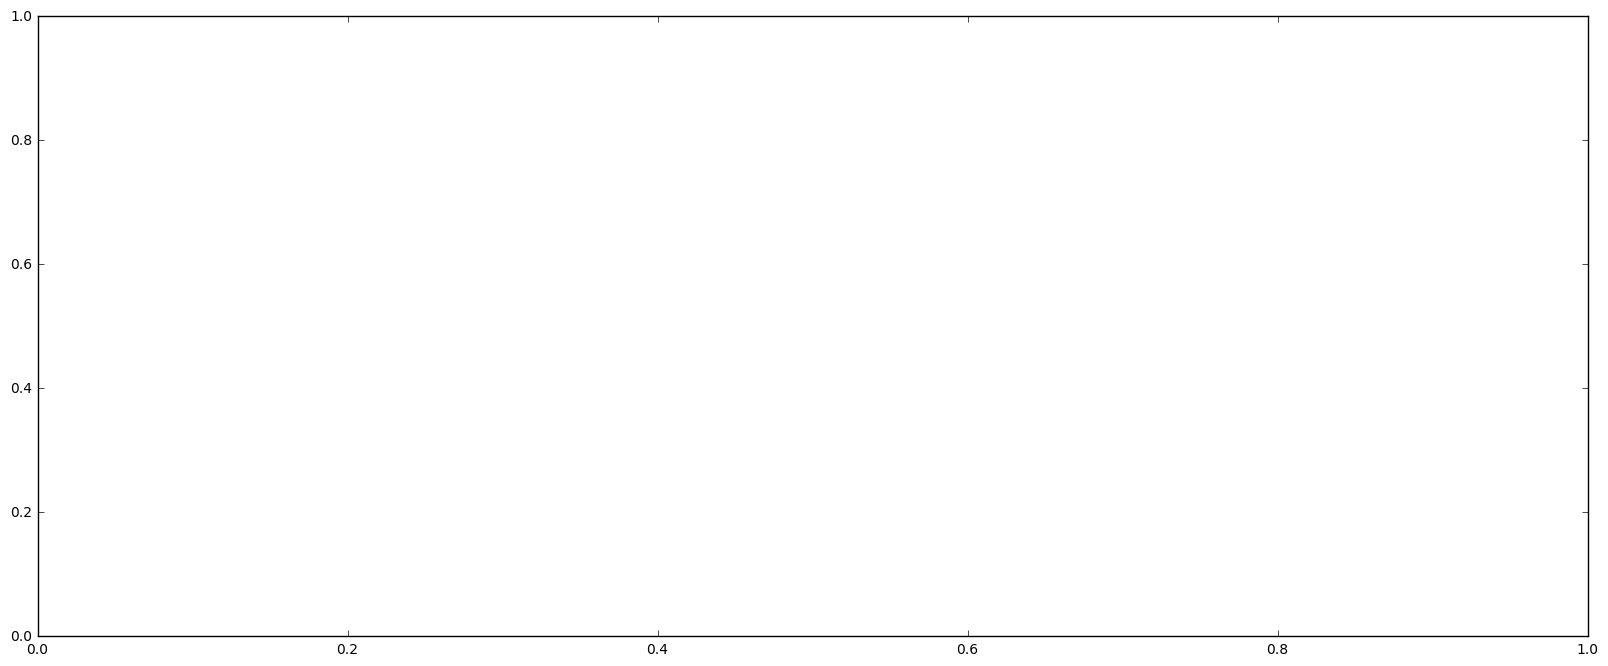

In [40]:
from mpldatacursor import HighlightingDataCursor

import matplotlib.cm as cm
import itertools
from mpldatacursor import datacursor


e_max = 1e3

for goal_var in plot_vars:
    fig = plt.figure(figsize=(20, 8))
    ax1 = fig.add_subplot(111)
    
    for c in df.columns:
        
        if c == goal_var:
            print c.split("_")[0]

            # http://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib
            colors    = cm.rainbow(np.linspace(0, 1, len(df[goal_var])))
            # http://matplotlib.org/api/markers_api.html#module-matplotlib.markers
            marker    = itertools.cycle(('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'))
            # http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle
            linestyle = itertools.cycle(('-', '--', '-.', ':')) 

            curves = [] 
            #
            for station, err, color in zip(pareja, df[goal_var], colors):

                epochs = df.index
                print epochs
                #df = results[k][station]
                #variable = np.where(df[goal_var] > e_max, 0, df[goal_var])
                variable = df[goal_var]
                print variable
                
                #http://widu.tumblr.com/post/43624348228/making-unfilled-hollow-markers-in-matplotlib
                curve, = ax1.plot([epochs]*len(variable), variable,
                                 marker=marker.next(), markersize=7, markeredgewidth=1,
                                 markeredgecolor=color, markerfacecolor='None',
                                 linestyle=linestyle.next(),
                                 label=station+" "+goal_var)

                curves.append(curve)
                    
                    
        elif c.split("_")[0] == "coop":
            print c.split("_")[0]

    
    ax1.set_title(var+" Positioning")
    ax1.set_xlabel("gps_sow")
    ax1.set_ylabel("Position error [m]")
    ax1.legend()

    # para poder resaltar las curvas
    HighlightingDataCursor(curves)
    datacursor(display='multiple', draggable=True)      

In [ ]:
def plot_df_errors(results, stlone_vars=None, cooper_vars=None, e_max=100):
                    
    #from matplotlib.lines import Line2D
    from mpldatacursor import HighlightingDataCursor
    
    import matplotlib.cm as cm
    import itertools
    from mpldatacursor import datacursor
    
    escenarios = [k for k in results.keys()]
    
    if "standalone" in escenarios and "cooperative" in escenarios:
        fig = plt.figure(figsize=(20,15))
        ax1 = fig.add_subplot(211)
        ax2 = fig.add_subplot(212)
        
    elif "cooperative" in escenarios and "standalone" not in escenarios:
        fig = plt.figure(figsize=(20, 8))
        ax2 = fig.add_subplot(111)
        
    elif "standalone" in escenarios:
        fig = plt.figure(figsize=(20, 8))
        ax1 = fig.add_subplot(111)
        
    for k, v in results.iteritems():
        
        if k == "standalone":

            # http://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib
            colors    = cm.rainbow(np.linspace(0, 1, len(results[k].keys())))
            # http://matplotlib.org/api/markers_api.html#module-matplotlib.markers
            marker    = itertools.cycle(('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'))
            # http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle
            linestyle = itertools.cycle(('-', '--', '-.', ':')) 

            curves = [] 
            #
            for station, color in zip(results[k].keys(), colors):

                epochs = results[k][station].index

                for var in stlone_vars:

                    #if axisNum < len(linestyles):
                    df = results[k][station]
                    variable = np.where(df[var] > e_max, 0, df[var])

                    #http://widu.tumblr.com/post/43624348228/making-unfilled-hollow-markers-in-matplotlib
                    curve, = ax1.plot(epochs , variable,
                                     marker=marker.next(), markersize=7, markeredgewidth=1,
                                     markeredgecolor=color, markerfacecolor='None',
                                     linestyle=linestyle.next(),
                                     label=station+" "+var)

                    curves.append(curve)



            ax1.set_ylim([-1, e_max])
            ax1.set_title(k+" Positioning")
            ax1.set_xlabel("gps_sow")
            ax1.set_ylabel("Position error [m]")
            ax1.legend()

            # para poder resaltar las curvas
            HighlightingDataCursor(curves)
            datacursor(display='multiple', draggable=True)

        elif k == "cooperative":

            # http://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib
            colors    = cm.rainbow(np.linspace(0, 1, len(results[k].keys())))
            # http://matplotlib.org/api/markers_api.html#module-matplotlib.markers
            marker    = itertools.cycle(('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'))
            # http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle
            linestyle = itertools.cycle(('-', '--', '-.', ':')) 

            curves = []
            #ax = fig.add_subplot(212)
            for pareja, color in zip(results[k].keys(), colors):

                epochs = results[k][pareja].index

                for var in cooper_vars:

                    if var.split("_")[-1] == "local":

                        local = pareja.split(",")[0]
                        df = results[k][pareja]
                        variable = np.where(df[var] > e_max, 0, df[var])

                        curve, = ax2.plot(epochs, variable,
                                         marker=marker.next(), markersize=7, markeredgewidth=1,
                                         markeredgecolor=color, markerfacecolor='None',
                                         linestyle=linestyle.next(),
                                         label="coop_err_"+local+"(local)")
                        curves.append(curve)


                    elif var.split("_")[-1] == "remote":

                        remot = pareja.split(",")[1]
                        df = results[k][pareja]
                        variable = np.where(df[var] > e_max, 0, df[var])# df[df[var] < e_max]

                        curve, = ax2.plot(epochs, variable,
                                         marker=marker.next(), markersize=7, markeredgewidth=1,
                                         markeredgecolor=color, markerfacecolor='None',
                                         linestyle=linestyle.next(),
                                         label="coop_err_"+remot+"(remote)")
                        curves.append(curve)

            ax2.set_ylim([-1, e_max])
            ax2.set_title(k+" Positioning")
            ax2.set_xlabel("gps_sow")
            ax2.set_ylabel("Position error [m]")
            ax2.legend()

            # para poder resaltar MULTPLES curvas
            HighlightingDataCursor(curves)
            # https://pypi.python.org/pypi/mpldatacursor/
            datacursor(display='multiple', draggable=True)

        else:
            pass

### Conclusion del experimento

la distancia promedio entre las estaciones es de 5 km y se aprecia una mejora en el posicionamiento en modo cooperativo de 3 m

## Probando con otra pareja (3 estaciones)

In [ ]:
%matplotlib inline
from IPython.display import HTML
%run -i ../../code/multirover.py

dia1 = "010"
dian = "010"
ano = "2017"

Observable = "C1"
# Variables de la grafica
error_max = 100

# Ubicacion de la Rinex local DB 
Rinex_dataBase      = "../../new_data"
Simu_Folder         = getcwd() +"/" + "Temp_Simul_data"

parejas_kmz = {}
parejas_kmz[0] = ("OLVN", "AIRS", "NWBL", "GERD",)

RinexDB = descarga_Rinex_Compri(Rinex_dataBase, parejas_kmz, dia1, dian, ano)
## Leer los rinex almacenado en mi equipo
RinexDB = read_Rinex_Compri(Rinex_dataBase, parejas_kmz)

In [ ]:
obsfile1 = "../../NavFiles/olvn0100.17o" 
navfile1 = "../../NavFiles/olvn0100.17n" 

obsfile2 = "../../NavFiles/airs0100.17o"
navfile2 = "../../NavFiles/airs0100.17n"

obsfile3 = "../../NavFiles/nwbl0100.17o"
navfile3 = "../../NavFiles/nwbl0100.17n"

obsfile4 = "../../NavFiles/gerd0100.17o"
navfile4 = "../../NavFiles/gerd0100.17n"

data1, b1, rec_pos1 = rinex_to_dataframe_ionosfe(obsfile1, navfile1)
data2, b2, rec_pos2 = rinex_to_dataframe_ionosfe(obsfile2, navfile2)
data3, b3, rec_pos3 = rinex_to_dataframe_ionosfe(obsfile3, navfile3)
#data4, b4, rec_pos4 = rinex_to_dataframe_ionosfe(obsfile4, navfile4)


data = [data1, data2, data3]
#data = [data1, data2, data3, data4]

realpos=[rec_pos1, rec_pos2, rec_pos3]
#realpos=[rec_pos1, rec_pos2, rec_pos3, rec_pos4]

In [ ]:
%run -i ../../code/multirover.py

pareja = ("OLVN", "AIRS", "NWBL",)# "GERD",) #("TGMX", "UNPM", "CNC0",) #  ("REPO", "REP2", "REP3", "REP4",) #("BARA", "TGDR", "JME2",) 

Results = {}

import re 
# http://stackoverflow.com/questions/2669059/how-to-sort-alpha-numeric-set-in-python
def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)


res_plot = 100
results = []

for epoc in range(len(data[0])):
    
    if epoc % res_plot == 0:
        csats = data[0].iloc[epoc]['prns']
        for k, (d, station) in enumerate(zip(data, pareja)): # enumerate(zip(data[1:], pareja[1:])):
            csats = list( set(csats) & set(d.iloc[epoc]['prns']))

        csats = sorted_nicely(csats)
        def simple_test_multirover(data_common, pareja, real_pos, Obser="C1", 
                           local=None, remote=None, dist=None,
                           iono_model_master=None,
                           iono_model_rover =None,
                           res_plot=300):
    
    Results = {}
    r = []
    
    dc_est = []
    d_real = []
    stdalone_pos = []
    stdalone_err = []
    coop_pos = []
    coop_err = []
    coop_t = []
            
    #print ("\t\t Rinex Observation: "), epoc
    """
    for i in range(len(data_common)):
        if i % res_plot == 0:
            print i,
    """
    dat = data_common.iloc[0]
    gps_sow = dat.gps_sow

    #print "Satelites en común ", len(dat['csats']), len(dat['prns'])
    if len(dat['csats'])>=4:

        # Metodos desarrollados
        ## Compute standalone positions
        for k, station in enumerate(pareja):
            if k == 0:

                #print np.shape(dat.loc['prns_pos_master']), np.shape(dat[Obser+'_master']), np.shape(dat['prns_clockbias_master'])
                
                #print "d", np.shape(dat.loc['prns_clockbias_master'])
                posstd,_,_,_ = compute_least_squares_position(dat.loc['prns_pos_master'],
                                                              dat.loc['prns_clockbias_master'],
                                                              dat.loc[Obser+'_master'])
                err = np.linalg.norm(posstd[:3] - real_pos[k])

                stdalone_pos.append(posstd[:3])
                stdalone_err.append(err)

            else:
                #print "e", np.shape(dat.loc['prns_clockbias_'+station])
                posstd,_,_,_ = compute_least_squares_position(dat.loc['prns_pos_'+station],
                                                              dat.loc['prns_clockbias_'+station],
                                                              dat.loc[Obser+"_"+station])
                err = np.linalg.norm(posstd[:3] - real_pos[k])

                stdalone_pos.append(posstd[:3])
                stdalone_err.append(err)

        # compute distances between receivers
        for k, station in enumerate(pareja):
            if k != 0:
                #print k, stdalone_pos[0], stdalone_pos[k]
                dc, teta, dc_vec = d_teta_calc(stdalone_pos[0], stdalone_pos[k])
                dr, teta, dc_vec = d_teta_calc(real_pos[0], real_pos[k])
                dc_est.append(dc)
                d_real.append(dr)

        start_time = time.time()
        
        if is_number(dist):
            ri,_,_,_ = coop_ls_solver_multirover(dat["gps_sow"], pareja, [dist*x for x in d_real], dat,
                                             iono_model_master=iono_model_master,
                                             iono_model_rover =iono_model_rover)
        elif dist == None:
            ri,_,_,_ = coop_ls_solver_multirover(dat["gps_sow"], pareja, dc_est, dat,
                                                 iono_model_master=iono_model_master,
                                                 iono_model_rover =iono_model_rover)
        coop_t = time.time() - start_time

        #r.append([gps_sow, real_pos, d_real, dc_est, coop_t, ri, data_common])  

        c = 0
        for k, station in enumerate(pareja):
            if k == 0:
                coop_pos.append(ri[4*k:4*(k+1)-1])
                coop_err.append(np.linalg.norm(ri[4*k:4*(k+1)-1] - real_pos[k]))
            else:
                ini = 4*k #+ c
                fin = 4*(k+1)-1 # + c
                #print
                #print k, ini, fin, ri, np.shape(ri[ini:fin]), np.shape(real_pos[k])
                coop_pos.append(ri[ini:fin])
                coop_err.append(np.linalg.norm(ri[ini:fin] - real_pos[k]))
                c += 1
          
        
        #print dc_est
        #print stdalone_err
        #print coop_err
        #r.append([gps_sow, real_pos, d_real, dc_est, stdalone_pos, stdalone_err, coop_pos, coop_err, coop_t, ri, data_common])    
        r = [gps_sow, real_pos, d_real, dc_est, stdalone_pos, stdalone_err, coop_pos, coop_err, coop_t, ri, data_common]    
    else:
        return
    
    names = ["gps_sow" ,"real_pos", "dreal", "d_calc", "stdlone_pos", "stdlone_err", "coop_pos", "coop_err", "coop_time[s]", "rc_sol", "data_common"]
    
    return r, names #pd.DataFrame(r, columns=names)# Results
        #print "c", len(csats)#, csats
        #print ("\t\t Rinex Observation: "), epoc,
        gps_time = data[0].iloc[epoc].gps_sow

        for k, (d, station) in enumerate(zip(data, pareja)):
            
            #print gps_time,  d.ix[epoc].gps_sow
            if gps_time == d.ix[epoc].gps_sow:
                #print station
                error = False
                d_common = get_data(d_common, d, epoc, csats, station)

            else:
                error = True
                #print station, error

        if error == False:
            #Results.setdefault(str(pareja), {})["10"] =  simple_test_multirover(d_common, pareja, realpos, dist=1.)
            r, n = simple_test_multirover(d_common, pareja, realpos, dist=1.)
            results.append(r)
        else:
            print "no existen datos en comun para esta epoca GPS"
    
Results.setdefault(str(pareja), {})["10"] = pd.DataFrame(results, columns=n)

In [ ]:
def get_df_mean(R, stations, day, columns = ["stdlone_err", "coop_err", "dreal", "d_calc"]):
    
    results = pd.DataFrame()
    
    df = R[stations][day][columns]
    r = []
    for i in range(len(df)):
        d = df.iloc[i]
        for c in columns:
            #print k, d[k]
            d[c+"_mean"] = np.mean(d[c])

    results[str(stations)] = d
    return results

df = get_df_mean(Results, str(pareja), "10")
df

### Conclusion del experimento

como puede apreciarse un gran nivel de error en posicionamiento en modo cooperativo puede asociarse a que la distancia de separacion entre las estaciones es de cerca de 

# Test completa

In [2]:
%matplotlib inline

from IPython.display import HTML

%run -i ../../code/multirover.py

In [3]:
dia1 = "010"
dian = "010"
ano = "2017"

Observable = "C1"
# Variables de la grafica
error_max = 100

# Ubicacion de la Rinex local DB 
Rinex_dataBase      = "../../new_data"
Simu_Folder         = getcwd() +"/" + "Temp_Simul_data"

In [40]:
# agregando nuevos pares de estaciones (que no estan en el kmz)
#parejas_kmz        = get_data_stations("./Coconet_sites_2016.kmz", 1e3)
#parejas_kmz        = get_data_stations("./UNAVCO_perm.kmz", 300) # 110
parejas_kmz = {}

parejas_kmz[0] = ("OLVN", "AIRS", "NWBL",)
parejas_kmz[1] = ("BARA", "TGDR", "JME2",)
parejas_kmz[2] = ("p553", "p554", "ljrn", "fzhs",)
parejas_kmz[3] = ("CN20", "TGPM",)
parejas_kmz[4] = ('TGMX', 'UNPM',)

RinexDB = descarga_Rinex_Compri(Rinex_dataBase, parejas_kmz, dia1, dian, ano)
## Leer los rinex almacenado en mi equipo
RinexDB = read_Rinex_Compri(Rinex_dataBase, parejas_kmz)


 Descargando Nuevos Archivos ....
************************

	 [Estacion] 	 [dia GPS] 		 [RESULTADO]
	 olvn
			 010 		 No encontrados Ficheros ['d']
	 airs
			 010 		 No encontrados Ficheros ['d']
	 nwbl
			 010 		 Descarga Exitosa!!!
	 bara
			 010 		 Descarga Exitosa!!!
	 tgdr
			 010 		 Descarga Exitosa!!!
	 jme2
			 010 		 Descarga Exitosa!!!
	 p553
			 010 		 Descarga Exitosa!!!
	 p554
			 010 		 Descarga Exitosa!!!
	 ljrn
			 010 		 Descarga Exitosa!!!
	 fzhs
			 010 		 Descarga Exitosa!!!
	 cn20
			 010 		 Descarga Exitosa!!!
	 tgpm
			 010 		 Descarga Exitosa!!!
	 tgmx
			 010 		 Descarga Exitosa!!!
	 unpm
			 010 		 Descarga Exitosa!!!
Descarga Finalizada!! 



In [42]:
def multirover_test(Obser, error_max, parejas_kmz, RinexDB, dia1, dian, ano, distances=None,
                         Simu_Folder=None, 
                         res_plot=1000, 
                         iono_model_master=None,
                         iono_model_rover=None):
    
    
    
    def get_data(dat_common, data_rx, epoc, csats, station_name):
        import types
        requested_obstypes = ["C1", "C2", "P1", "P2", "L1", "L2", "S1", "S2"]
        columns2search = ["prns", "alphas", "betas", "prns_elev", "prns_az", "prns_clockbias", "prns_pos", "Iono"]

        col_rename = {k:k+"_master" for k in columns2search+requested_obstypes}
        col_rename["prns"] = "prns"

        r = []
        data = {}

        # http://thomas-cokelaer.info/blog/2014/06/pandas-how-to-compare-dataframe-with-none/
        if len(dat_common.columns) == 0: #isinstance(dat_common, types.NoneType) == True: #dat_common.empty:
            #print('DataFrame is empty!')
            obstypes = [c for c in data_rx.columns if c in requested_obstypes]

            #print "csats", len(csats)

            idx1 = []
            for k, sat in enumerate(data_rx.iloc[epoc].prns):
                if sat in csats:
                    idx1.append(k)

            columns = ["prns", "prns_elev", "prns_az", "prns_clockbias", "prns_pos", "Iono"]+obstypes
            names = []

            for col in data_rx.columns:
                if col in columns:
                    names.append(col)
                    values = data_rx.iloc[epoc][col][idx1]
                elif col == "prns":
                    names.append(col)
                    values = csats
                else:
                    names.append(col)
                    values = np.array(data_rx.iloc[epoc][col])

                r.append(values)

            r = pd.Series(r, index=names).to_frame()
            df_temp =pd.DataFrame(r.T, columns=names)
            df_temp.rename(columns=col_rename, inplace=True)
            return df_temp

        else:

            obstypes = [c for c in data_rx.columns if c in requested_obstypes]

            idx1 = []
            for k, sat in enumerate(data_rx.iloc[epoc].prns):
                if sat in csats:
                    idx1.append(k)

            for obstype in obstypes:
                dat_common[obstype+"_"+station_name] = pd.Series([data_rx.iloc[epoc][obstype][idx1]], index=dat_common.index)

            columns = ["prns_elev", "prns_az", "prns_clockbias", "prns_pos", "Iono"]

            for col in columns2search:
                if col in columns:
                    values = data_rx.iloc[epoc][col][idx1]
                    key = col+"_"+station_name
                elif col == "prns":
                    values = csats
                    key = "csats"
                else:
                    key = col+"_"+station_name
                    values = np.array(data_rx.iloc[epoc][col])

                dat_common[key] = pd.Series([values], index=dat_common.index)

        return dat_common
            
    
    def simple_test_multirover(data_common, pareja, real_pos, Obser="C1", 
                               local=None, remote=None, dist=None,
                               iono_model_master=None,
                               iono_model_rover =None,
                               res_plot=300):

        Results = {}
        r = []

        dc_est = []
        d_real = []
        stdalone_pos = []
        stdalone_err = []
        coop_pos = []
        coop_err = []
        coop_t = []

        #print ("\t\t Rinex Observation: "), epoc
        """
        for i in range(len(data_common)):
            if i % res_plot == 0:
                print i,
        """
        dat = data_common.iloc[0]
        gps_sow = dat.gps_sow

        #print "Satelites en común ", len(dat['csats']), len(dat['prns'])
        if len(dat['csats'])>=4:

            # Metodos desarrollados
            ## Compute standalone positions
            for k, station in enumerate(pareja):
                if k == 0:

                    #print np.shape(dat.loc['prns_pos_master']), np.shape(dat[Obser+'_master']), np.shape(dat['prns_clockbias_master'])

                    #print "d", np.shape(dat.loc['prns_clockbias_master'])
                    posstd,_,_,_ = compute_least_squares_position(dat.loc['prns_pos_master'],
                                                                  dat.loc['prns_clockbias_master'],
                                                                  dat.loc[Obser+'_master'])
                    err = np.linalg.norm(posstd[:3] - real_pos[k])

                    stdalone_pos.append(posstd[:3])
                    stdalone_err.append(err)

                else:
                    #print "e", np.shape(dat.loc['prns_clockbias_'+station])
                    posstd,_,_,_ = compute_least_squares_position(dat.loc['prns_pos_'+station],
                                                                  dat.loc['prns_clockbias_'+station],
                                                                  dat.loc[Obser+"_"+station])
                    err = np.linalg.norm(posstd[:3] - real_pos[k])

                    stdalone_pos.append(posstd[:3])
                    stdalone_err.append(err)

            # compute distances between receivers
            for k, station in enumerate(pareja):
                if k != 0:
                    #print k, stdalone_pos[0], stdalone_pos[k]
                    dc, teta, dc_vec = d_teta_calc(stdalone_pos[0], stdalone_pos[k])
                    dr, teta, dc_vec = d_teta_calc(real_pos[0], real_pos[k])
                    dc_est.append(dc)
                    d_real.append(dr)

            start_time = time.time()

            if is_number(dist):
                ri,_,_,_ = coop_ls_solver_multirover(dat["gps_sow"], pareja, [dist*x for x in d_real], dat,
                                                 iono_model_master=iono_model_master,
                                                 iono_model_rover =iono_model_rover)
            elif dist == None:
                ri,_,_,_ = coop_ls_solver_multirover(dat["gps_sow"], pareja, dc_est, dat,
                                                     iono_model_master=iono_model_master,
                                                     iono_model_rover =iono_model_rover)
            coop_t = time.time() - start_time

            #r.append([gps_sow, real_pos, d_real, dc_est, coop_t, ri, data_common])  

            c = 0
            for k, station in enumerate(pareja):
                if k == 0:
                    coop_pos.append(ri[4*k:4*(k+1)-1])
                    coop_err.append(np.linalg.norm(ri[4*k:4*(k+1)-1] - real_pos[k]))
                else:
                    ini = 4*k #+ c
                    fin = 4*(k+1)-1 # + c
                    #print
                    #print k, ini, fin, ri, np.shape(ri[ini:fin]), np.shape(real_pos[k])
                    coop_pos.append(ri[ini:fin])
                    coop_err.append(np.linalg.norm(ri[ini:fin] - real_pos[k]))
                    c += 1


            #print dc_est
            #print stdalone_err
            #print coop_err
            #r.append([gps_sow, real_pos, d_real, dc_est, stdalone_pos, stdalone_err, coop_pos, coop_err, coop_t, ri, data_common])    
            r = [gps_sow, real_pos, d_real, dc_est, stdalone_pos, stdalone_err, coop_pos, coop_err, coop_t, ri, data_common]    
        else:
            return

        names = ["gps_sow" ,"real_pos", "dreal", "d_calc", "stdlone_pos", "stdlone_err", "coop_pos", "coop_err", "coop_time[s]", "rc_sol", "data_common"]

        return r, names #pd.DataFrame(r, columns=names)# Results

    def clean_folder(abspath_Folder, silent_mode=True):
            cmd = "rm -rf "+abspath_Folder+"/*"
            if silent_mode == False:
                print ("\n"+cmd)
            system(cmd)
        
    
    import re 
    # http://stackoverflow.com/questions/2669059/how-to-sort-alpha-numeric-set-in-python
    def sorted_nicely( l ): 
        """ Sort the given iterable in the way that humans expect.""" 
        convert = lambda text: int(text) if text.isdigit() else text 
        alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
        return sorted(l, key = alphanum_key)
    
    
    def extract_rinex_files(RinexDB, k, RX, Simu_Folder, required_files=['n', 'o']):

        Temp = {}
        matches = [x for x in RinexDB.keys() if RX.lower() == x]
        
        if len(matches)> 0:
            
            RX = matches[0]
            for Obstype in RinexDB[RX].keys():
                station, ObsType = splitext(RinexDB[RX][Obstype])
                path = RinexDB[RX][Obstype]
                dirname, zipname = split(path)
                fname, ext = splitext(zipname)

                #print fname, ext, path
                cmd = "cp "+path+" "+Simu_Folder+"/"+zipname
                system(cmd)
                cmd2 = "gunzip "+Simu_Folder+"/"+zipname
                system(cmd2)

                if isfile(Simu_Folder+"/"+fname):
                    if k==0:
                        Temp.setdefault("master_"+RX,{})[Obstype[0]] = Simu_Folder+"/"+fname
                        Temp["master_"+RX].update({Obstype:path})
                    else:
                        Temp.setdefault("rover"+str(k)+"_"+RX,{})[Obstype[0]] = Simu_Folder+"/"+fname
                        Temp["rover"+str(k)+"_"+RX].update({Obstype:path})
                else:
                    if k==0:
                        Temp.setdefault("master_"+RX,{})[Obstype[0]] = ""
                        Temp["master_"+RX].update({Obstype:""})
                    else:
                        Temp.setdefault("rover"+str(k)+"_"+RX,{})[Obstype[0]] = ""
                        Temp["rover"+str(k)+"_"+RX].update({Obstype:""})

            station = Temp.keys()[0]
            files = [f for f in required_files if f in Temp[station].keys()]
            
            if (len(files) >= len(required_files)):
                return Temp
            else:
                return {}
        else:
            return {}
    
    if Simu_Folder==None:
        Simu_Folder = getcwd()+"/Temp_Simul_data"
        cmd1 = "mkdir -p " + Simu_Folder    # COMANDO CREA CARPETA temporal
        system(cmd1)

    print parejas_kmz
    print "\t [Station Pair] \t [GPS day] \t [year] \t\t [Process status]\n"
    
    Results = {}
    #data_common = {}
    
    for k, pareja in parejas_kmz.iteritems():
        data_common = pd.DataFrame()
        
        for d in range(int(dia1), int(dian)+1):

            Obsfiles = {}
            for k, station in enumerate(pareja):

                fname = str(station)+str(process_day2(d))+"."+ano[-2:]
                Obsfiles.update(extract_rinex_files(RinexDB, k, fname, Simu_Folder))

                if any(Obsfiles):
                    error = False
                else:
                    error = True

            if error or len(Obsfiles)<2 or len(Obsfiles)<2:
                print "WARNING! %s Aborting execution: missing rinex files for %s \n"%(tick_equis(1), pareja)
            
            else:
                par = tuple(Obsfiles.keys())
                print "\t %s \t\t %s \t\t %s \t\t %s Running..."%(pareja, d, ano,tick_equis(0))
                
                #print Obsfiles.keys()
                master_station = [elem for elem in Obsfiles.keys() if elem.split("_")[0] == "master"]
                rover_stations = [elem for elem in Obsfiles.keys() if elem.split("_")[0][:5] == "rover"]
                
                pareja = master_station + rover_stations
                
                if len(master_station) == 0:
                    print "no existe master"
                
                else:
                    #try:
                    
                    data = []
                    realpos = []
                    print Obsfiles[master_station[0]]['o'], Obsfiles[rover_stations[0]]['n']
                    
                    for p in pareja:
                        print p
                        data1, b1, rec_pos1 = rinex_to_dataframe_ionosfe(Obsfiles[p]['o'], Obsfiles[p]['n'])
                        data.append(data1)
                        # almacenando posicion real para calcular error dentro simple_test
                        realpos.append(rec_pos1)
                    
                    results = []
                    for epoc in range(len(data[0])):
    
                        if epoc % res_plot == 0:
                            csats = data[0].iloc[epoc]['prns']
                            for k, (d, station) in enumerate(zip(data, pareja)): # enumerate(zip(data[1:], pareja[1:])):
                                csats = list( set(csats) & set(d.iloc[epoc]['prns']))

                            csats = sorted_nicely(csats)
                            d_common = pd.DataFrame()
                            #print "c", len(csats)#, csats
                            #print ("\t\t Rinex Observation: "), epoc,
                            gps_time = data[0].iloc[epoc].gps_sow

                            for k, (d, station) in enumerate(zip(data, pareja)):

                                #print gps_time,  d.ix[epoc].gps_sow
                                if gps_time == d.ix[epoc].gps_sow:
                                    #print station
                                    error = False
                                    d_common = get_data(d_common, d, epoc, csats, station)

                                else:
                                    error = True
                                    #print station, error

                            if error == False:
                                #Results.setdefault(str(pareja), {})["10"] =  simple_test_multirover(d_common, pareja, realpos, dist=1.)
                                r, n = simple_test_multirover(d_common, pareja, realpos, dist=1.)
                                results.append(r)
                            else:
                                print "no existen datos en comun para esta epoca GPS"

                    Results.setdefault(str(pareja), {})["10"] = pd.DataFrame(results, columns=n)
                    
                    
                    """
                    data1, b1, rec_pos1 = rinex_to_dataframe_ionosfe(Obsfiles[master_station[0]]['o'], Obsfiles[master_station[0]]['n'])
                    #data2, b2, rec_pos2 = rinex_to_dataframe_iono(Obsfiles[rover_stations[0]]['o'], Obsfiles[rover_stations[0]]['n'])
                    #data_common = extract_common3(data1, data2, rover_name=rover_stations[0])

                    # almacenando posicion real para calcular error dentro simple_test
                    real_pos.append(rec_pos1)
                    
                    data_common = pd.DataFrame()
                    c = 0 
                    for rover in rover_stations:
                        data2, b2, rec_pos2 = rinex_to_dataframe_ionosfe(Obsfiles[rover]['o'], Obsfiles[rover]['n'])
                        temp_df = extract_common3(data1, data2, rover_name=rover, control=c)
                        data_common = pd.concat([data_common, temp_df], axis=1)
                        data1 = data_common
                        c += 1
                        
                        # almacenando posicion real para calcular error dentro simple_test
                        real_pos.append(rec_pos2)

                    Results.setdefault(str(pareja), {})[d] = simple_test_multirover(data_common, pareja, real_pos,
                                                                                    dist=distances,
                                                                                    res_plot=res_plot, 
                                                                                    iono_model_master=iono_model_master,
                                                                                    iono_model_rover =iono_model_rover)
                    
                    """
                    
                    """
                    except Exception as e:
                        msg = "WARNING! %s \t\t %s \t\t %s Aborting execution: Unexpected error"
                        print (msg%(pareja, d, tick_equis(1)), str(e))
                        print('Error on line {}'.format(sys.exc_info()[-1].tb_lineno), type(e), e)

                    except IOError as e:
                        print "I/O error({0}): {1}".format(e.errno, e.strerror)
                    """


    print ("\n\n\tSimulation Finished!")
    print ("\t "+"*"*30)
    #clean_folder(Simu_Folder, silent_mode=False)
    clean_folder(Simu_Folder)
    
    return Results#, data1

In [43]:
R = multirover_test(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano, 
                             distances=None,
                             Simu_Folder=None,
                             res_plot=300,
                             iono_model_master=None,
                             iono_model_rover =None)

{0: ('OLVN', 'AIRS', 'NWBL'), 1: ('BARA', 'TGDR', 'JME2'), 2: ('p553', 'p554', 'ljrn', 'fzhs'), 3: ('CN20', 'TGPM'), 4: ('TGMX', 'UNPM')}
	 [Station Pair] 	 [GPS day] 	 [year] 		 [Process status]

	 ('OLVN', 'AIRS', 'NWBL') 		 10 		 2017 		 ✔  Running...
/media/DATOS/0_bitbucket/repo/Avances/Temp_Simul_data/olvn0100.17o /media/DATOS/0_bitbucket/repo/Avances/Temp_Simul_data/airs0100.17n
master_olvn0100.17
WARNING! observation `C2` no present in file /media/DATOS/0_bitbucket/repo/Avances/Temp_Simul_data/olvn0100.17o
rover1_airs0100.17
WARNING! observation `C2` no present in file /media/DATOS/0_bitbucket/repo/Avances/Temp_Simul_data/airs0100.17o
rover2_nwbl0100.17
WARNING! observation `C2` no present in file /media/DATOS/0_bitbucket/repo/Avances/Temp_Simul_data/nwbl0100.17o
	 ('BARA', 'TGDR', 'JME2') 		 10 		 2017 		 ✔  Running...
/media/DATOS/0_bitbucket/repo/Avances/Temp_Simul_data/bara0100.17o /media/DATOS/0_bitbucket/repo/Avances/Temp_Simul_data/tgdr0100.17n
master_bara0100.17
WARNING

In [44]:
def get_df_mean(R, stations, day, columns = ["stdlone_err", "coop_err", "dreal", "d_calc"]):
    
    results = pd.DataFrame()
    
    df = R[stations][day][columns]
    r = []
    for i in range(len(df)):
        d = df.iloc[i]
        for c in columns:
            #print k, d[k]
            d[c+"_mean"] = np.mean(d[c])

    results[str(stations)] = d
    return results

In [45]:
pareja = R.keys()
df = get_df_mean(R, str(pareja[0]), "10")
df

['master_p5530100.17', 'rover1_p5540100.17', 'rover2_ljrn0100.17', 'rover3_fzhs0100.17']
stdlone_err       [80.42649768, 79.0206983011, 79.9212520892, 80...                                      
coop_err          [80.4264976834, 73.8759089379, 74.7746167988, ...                                      
dreal                 [5522.67744394, 3219.97340059, 4082.90124383]                                      
d_calc                [5521.72971033, 3219.75717967, 4082.51284799]                                      
stdlone_err_mean                                            79.9735                                      
coop_err_mean                                               76.9327                                      
dreal_mean                                                  4275.18                                      
d_calc_mean                                                 4274.67

In [46]:
df = get_df_mean(R, str(pareja[1]), "10")
df

['master_olvn0100.17', 'rover1_airs0100.17', 'rover2_nwbl0100.17']
stdlone_err           [58.3039419148, 57.7162885362, 60.8871612802]                
coop_err               [58.303941912, 57.3574855839, 43.5411770876]                
dreal                                [1814.27191325, 8150.55579786]                
d_calc                               [1815.96223603, 8153.88516873]                
stdlone_err_mean                                            58.9691                
coop_err_mean                                               53.0675                
dreal_mean                                                  4982.41                
d_calc_mean                                                 4984.92

In [47]:
df = get_df_mean(R, str(pareja[2]), "10")
df

['master_tgmx0100.17', 'rover1_unpm0100.17']
stdlone_err                    [46.8170375112, 47.6122919932]
coop_err                       [46.8170375098, 47.5636328032]
dreal                                         [145.574283474]
d_calc                                         [143.87128417]
stdlone_err_mean                                      47.2147
coop_err_mean                                         47.1903
dreal_mean                                            145.574
d_calc_mean                                           143.871

In [48]:
df = get_df_mean(R, str(pareja[3]), "10")
df

['master_bara0100.17', 'rover1_tgdr0100.17', 'rover2_jme20100.17']
stdlone_err           [136.020057637, 116.666073194, 79.7312122631]                
coop_err               [136.02005764, 116.375929349, 98.0970232659]                
dreal                                [640.647441292, 152480.099181]                
d_calc                               [667.106889182, 152454.874487]                
stdlone_err_mean                                            110.806                
coop_err_mean                                               116.831                
dreal_mean                                                  76560.4                
d_calc_mean                                                   76561

In [49]:
df = get_df_mean(R, str(pareja[4]), "10")
df

['master_cn200100.17', 'rover1_tgpm0100.17']
stdlone_err                     [35.4351733451, 53.374322135]
coop_err                       [35.4351733461, 60.1366920779]
dreal                                         [198.872113347]
d_calc                                        [183.280911072]
stdlone_err_mean                                      44.4047
coop_err_mean                                         47.7859
dreal_mean                                            198.872
d_calc_mean                                           183.281